In [1]:
'''
    ------------
    # LIBRARIES #
    ------------
'''

from qat.lang.AQASM import Program, H, CNOT
from qat.qpus import PyLinalg
import matplotlib.pyplot as plt
import numpy as np

In [2]:
'''
    ------------
    # INITIAL PARAMETERS #
    ------------
'''

nbqbits = 2
pylinalgqpu = PyLinalg()

In [3]:
'''
    ------------
    # PREPARING THE STATE #
    ------------
'''
qprog = Program()
qbits = qprog.qalloc(nbqbits)
qprog.apply(H, qbits[0]) 
qprog.apply(CNOT, qbits[0], qbits[1])

circuit = qprog.to_circ()

%qatdisplay --svg circuit

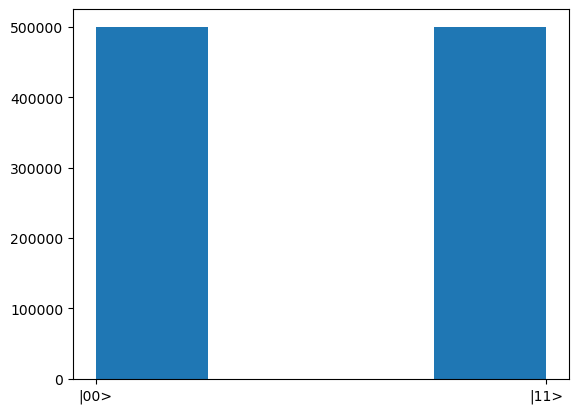

In [4]:
'''
    ------------
    # SIMULATING AN EXPERIMENT #
    ------------
    Here we simulate an experiment where a number nshots of measurements is performed on the state 
    and the results are plotted in a histogram
'''
nshots=10**6 # number of measurements performed #

results=[] # list of measurement results #

job = circuit.to_job(nbshots=nshots, aggregate_data=False)
result = pylinalgqpu.submit(job)

for sample in result:
    results.append(str(sample.state))
    
plt.hist(results, bins=2**nbqbits)

plt.savefig('hist.png')

In [5]:
'''
    ------------
    # GETTING THE PROBABILITIES #
    ------------

'''
results=[]

for sample in result:
    results.append(sample.state.int)
    
probs=(np.histogram(results, bins=2**nbqbits)[0])/nshots

print(probs)

[0.499944 0.       0.       0.500056]


In [29]:
'''
    ------------
    # SIMULATE MULTIPLE EXPERIMENTS #
    ------------
    Here we simulate multiple experiments where nshots varies and see how that influences the probabilities
'''

expected=[0.5, 0, 0, 0.5]
nshots=10000 # number of experiments done in one trial #
trials=7
probs=[]
results=[]

for i in range(trials):
    job = circuit.to_job(nbshots=nshots, aggregate_data=False)
    result = pylinalgqpu.submit(job)
    for sample in result:
        results.append(sample.state.int)
    prob=(np.histogram(results, bins=2**nbqbits)[0])/(nshots*(i+1))
    probs.append(prob)
    
probs=np.array(probs)
#print(probs)

10000
10000
20000
20000
30000
30000
40000
40000
50000
50000
60000
60000
70000
70000


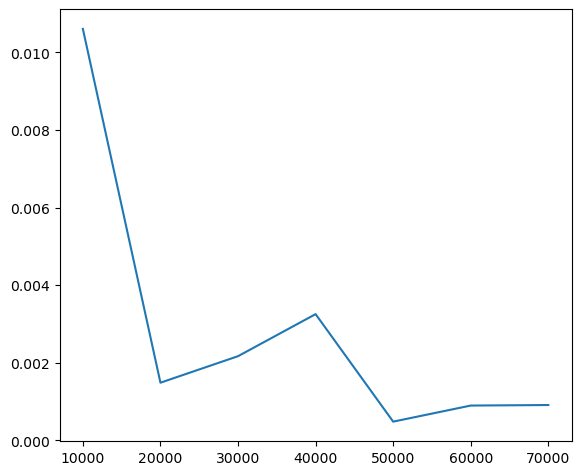

In [31]:
# Let's plot the difference to the expected state as nshots rises #

distances=[]
nmeasure=range(nshots,nshots*(trials+1),nshots)

for prob in probs:
    distance=np.linalg.norm(prob-expected)
    distances.append(distance)

fig = plt.figure()
ax = fig.add_axes([0.1, 0.2, 0.8, 0.9])
ax.plot(nmeasure, distances)